In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Merged file.xlsx')

In [3]:
df.head()

,Tweets
0,Reality of Hindi Media sorry godi Media. \n#Ma...
1,"यह हक़ सिर्फ, झूठ को है कि \nवह ज़ोर से बोले, ..."
2,#Kurukshetra | राहुल गांधी कहते हैं कि हिंदू ट...
3,#ManipurVoilence के बीच कुकी महिलाओं को निर्वस...
4,#Kurukshetra | I-N-D-I-A से कोई इंडिया नहीं हो...


In [4]:
from langdetect import detect

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rishavghosh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rishavghosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
hindi_stopwords = [
    "मैं", "मुझको", "मेरा", "अपने आप को", "हमने", "हमारा", "अपना", "हम",
    "आप", "आपका", "तुम्हारा", "अपने आप", "स्वयं", "वह", "इसे", "उसके", "खुद को",
    "कि वह", "उसकी", "उसका", "खुद ही", "यह", "इसके", "उन्होने", "अपने", "क्या",
    "जो", "किसे", "किसको", "कि", "ये", "हूँ", "होता है", "रहे", "थी", "थे", "होना",
    "गया", "किया जा रहा है", "किया है", "है", "पडा", "होने", "करना", "करता है",
    "किया", "रही", "एक", "लेकिन", "अगर", "या", "क्यूंकि", "जैसा", "जब तक",
    "जबकि", "की", "पर", "द्वारा", "के लिए", "साथ", "के बारे में", "खिलाफ", "बीच",
    "में", "के माध्यम से", "दौरान", "से पहले", "के बाद", "ऊपर", "नीचे", "को",
    "से", "तक", "से नीचे", "करने में", "निकल", "बंद", "से अधिक", "तहत", "दुबारा",
    "आगे", "फिर", "एक बार", "यहाँ", "वहाँ", "कब", "कहाँ", "क्यों", "कैसे",
    "सारे", "किसी", "दोनों", "प्रत्येक", "ज्यादा", "अधिकांश", "अन्य", "में कुछ",
    "ऐसा", "में कोई", "मात्र", "खुद", "समान", "इसलिए", "बहुत", "सकता", "जायेंगे",
    "जरा", "चाहिए", "अभी", "और", "कर दिया", "रखें", "का", "हैं", "इस", "होता",
    "करने", "ने", "बनी", "तो", "ही", "हो", "इसका", "था", "हुआ", "वाले", "बाद",
    "लिए", "सकते", "इसमें", "दो", "वे", "करते", "कहा", "वर्ग", "कई", "करें",
    "होती", "अपनी", "उनके", "यदि", "हुई", "जा", "कहते", "जब", "होते", "कोई",
    "हुए", "व", "जैसे", "सभी", "करता", "उनकी", "तरह", "उस", "आदि", "इसकी",
    "उनका", "इसी", "पे", "तथा", "भी", "परंतु", "इन", "कम", "दूर", "पूरे",
    "गये", "तुम", "मै", "यहां", "हुये", "कभी", "अथवा", "गयी", "प्रति", "जाता",
    "इन्हें", "गई", "अब", "जिसमें", "लिया", "बड़ा", "जाती", "तब", "उसे",
    "जाते", "लेकर", "बड़े", "दूसरे", "जाने", "बाहर", "स्थान", "उन्हें",
    "गए", "ऐसे", "जिससे", "समय", "दोनों", "किए", "रहती", "इनके", "इनका"]
   


In [7]:

def preprocess_text(text, lang):
    if lang == 'en':
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text.lower())
    elif lang == 'hi':
        stop_words = set(hindi_stopwords)
        tokens = word_tokenize(text)
    elif lang == 'id':
        stop_words = set(stopwords.words('indonesian'))
        tokens = word_tokenize(text)
    elif lang == 'tl':
        stop_words = set(stopwords.words('english'))  # Tagalog stopwords are less common
        tokens = word_tokenize(text)
    elif lang == 'bn':
        stop_words = set(stopwords.words('bengali'))
        tokens = word_tokenize(text)
    elif lang in ['pt', 'mr', 'da', 'ca', 'fr', 'it', 'sv', 'de', 'tr', 'ml', 'pa', 'so']:
        stop_words = set(stopwords.words('english'))  # Using English stopwords as a fallback
        tokens = word_tokenize(text)
    else:
        stop_words = set()
        tokens = word_tokenize(text)
    
    cleaned_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(cleaned_tokens)

In [8]:
def preprocess_column(row):
    lang = detect(row)
    preprocessed_text = preprocess_text(row, lang)
    return preprocessed_text


In [9]:
#df['Tweets'] = df['Tweets'].apply(preprocess_column)


In [10]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join(text.split())
        return text
    else:
        return ''

In [11]:
df['Tweets'] = df['Tweets'].apply(clean_text)

In [12]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rishavghosh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
df.head()

,Tweets
0,Reality of Hindi Media sorry godi Media Manipu...
1,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...
2,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक हकगर...
3,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...
4,Kurukshetra INDIA स कई इडय नह ह जतकगरस परट दनय...


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [15]:

def get_sentiment_score(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Apply VADER sentiment analysis and create a new column 'Sentiment'
df['Sentiment'] = df['Tweets'].apply(get_sentiment_score)

In [16]:
def get_sentiment_label(score):
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the get_sentiment_label function to the 'Sentiment' column
df['Sentiment_Label'] = df['Sentiment'].apply(get_sentiment_label)


In [17]:
df.drop('Sentiment', axis = 1, inplace = True)

In [18]:
df

,Tweets,Sentiment_Label
0,Reality of Hindi Media sorry godi Media Manipu...,Negative
1,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...,Neutral
2,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक हकगर...,Neutral
3,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...,Neutral
4,Kurukshetra INDIA स कई इडय नह ह जतकगरस परट दनय...,Neutral
...,...,...
676,jdhankhar1 CBI approached u in Jan 2021 4 perm...,Negative
677,httpstcog0AN8TxzEN Must listen BengalBurning B...,Neutral
678,Should be remembered by all political parties ...,Positive
679,ABHIJIT_LS Has Bihar got The imagejeevi is use...,Neutral


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Sentiment_Label', ylabel='count'>

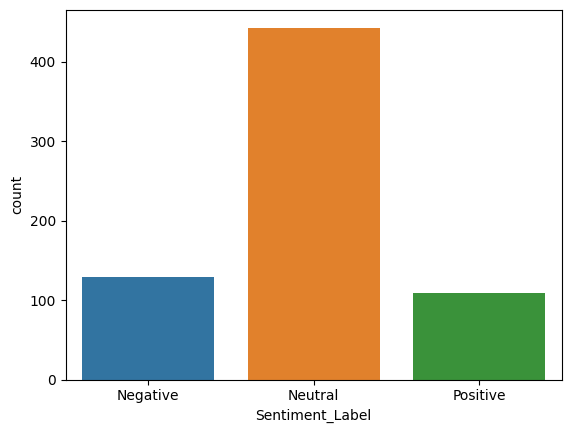

In [20]:
sns.countplot(data = df, x = 'Sentiment_Label')

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load the tokenizer and model for multilingual sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)


/Users/rishavghosh/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [22]:
def get_sentiment_label(score):
    if score < 0.4:
        return "Negative"
    elif score > 0.6:
        return "Positive"
    else:
        return "Neutral"

# Apply the sentiment analysis pipeline to the 'Tweets' column
df['SentimentScore'] = df['Tweets'].apply(lambda text: sentiment_analyzer(text)[0]['score'])
df['Sentiment_Label_transformers'] = df['SentimentScore'].apply(get_sentiment_label)

In [23]:
df.drop('SentimentScore', axis = 1, inplace = True)

In [24]:
df.head()

,Tweets,Sentiment_Label,Sentiment_Label_transformers
0,Reality of Hindi Media sorry godi Media Manipu...,Negative,Neutral
1,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...,Neutral,Negative
2,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक हकगर...,Neutral,Negative
3,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...,Neutral,Negative
4,Kurukshetra INDIA स कई इडय नह ह जतकगरस परट दनय...,Neutral,Neutral


<Axes: xlabel='Sentiment_Label_transformers', ylabel='count'>

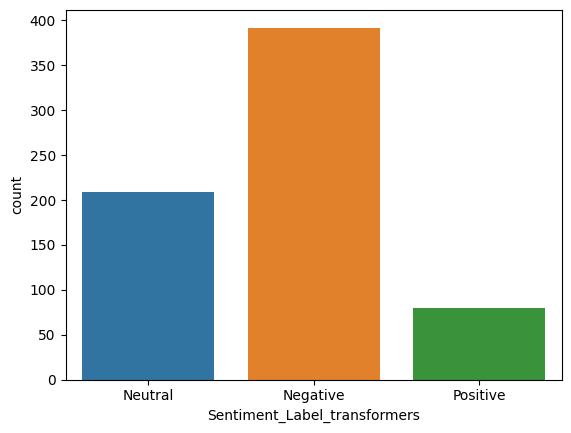

In [25]:
sns.countplot(data = df, x = 'Sentiment_Label_transformers')

In [26]:
import numpy as np
accurate = np.mean(df['Sentiment_Label'] == df['Sentiment_Label_transformers'])

In [27]:
accurate

0.2701908957415565